### Connect to Strava API

In [1]:
from stravaio import strava_oauth2
STRAVA_CLIENT_ID = # Client ID here
STRAVA_CLIENT_SECRET = "put client secret here"
strava_oauth2(client_id=STRAVA_CLIENT_ID, client_secret=STRAVA_CLIENT_SECRET)

In [2]:
from stravalib.client import Client
ACCESS_TOKEN = "copy access token here"
client = Client(access_token=ACCESS_TOKEN)
activities = client.get_activities()

### Choose Required Fields

In [2]:
fields = list(activities)[100]
fields.to_dict()

In [4]:
my_cols =['name',
          'average_speed',
          'average_watts', 
          'distance',
          'total_elevation_gain',
          'type', 
          'start_date_local',
          'kudos_count']

In [5]:
data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in my_cols])

### Running Kudos Trends

In [6]:
import pandas as pd
df = pd.DataFrame(data, columns=my_cols)
df['distance'] = round(df['distance']/1000,2)
df['start_date_local'] = df['start_date_local'].str[:7]
display(df)
pd.options.display.max_rows = 300
pd.options.display.max_rows

,name,average_speed,average_watts,distance,total_elevation_gain,type,start_date_local,kudos_count
0,Aborted long run for bad knee 🤕,3.855,NaN,10.01,93.5,Run,2020-04,13
1,Solo Century 💯,8.324,149.7,101.75,595.6,Ride,2020-04,24
2,Run 5 Donate 5 💪👏,4.232,NaN,5.04,18.4,Run,2020-04,15
3,Empty Easter Roads,7.479,159.0,54.46,827.7,Ride,2020-04,16
4,Lunch Run,3.836,NaN,10.03,97.3,Run,2020-04,15
5,Hartwith Bank & Greenhow Hill ⛰😍,6.838,148.3,63.38,1111.9,Ride,2020-04,19
6,Summer? 🌞,7.834,151.8,31.73,326.5,Ride,2020-04,17
7,Filthy headwind to Otley 😤,7.183,160.2,50.27,785.9,Ride,2020-04,17
8,😴,3.451,NaN,5.09,64.0,Run,2020-04,7
9,Evening Run,4.260,NaN,5.02,28.6,Run,2020-04,9


300

In [27]:
df.to_excel("Documents/Strava.xlsx")

In [7]:
# Filter dataset to show only runs
row=0
for i in df.index:
    if len(df['type'][row])!=3:
        df.drop(axis=0,labels=row,inplace=True)
    row+=1
    
df['average_speed'] = round(16.7/df['average_speed'],2)

In [8]:
df = df.reset_index(drop=True)
df

,name,average_speed,average_watts,distance,total_elevation_gain,type,start_date_local,kudos_count
0,Aborted long run for bad knee 🤕,4.33,NaN,10.01,93.5,Run,2020-04,13
1,Run 5 Donate 5 💪👏,3.95,NaN,5.04,18.4,Run,2020-04,15
2,Lunch Run,4.35,NaN,10.03,97.3,Run,2020-04,15
3,😴,4.84,NaN,5.09,64.0,Run,2020-04,7
4,Evening Run,3.92,NaN,5.02,28.6,Run,2020-04,9
5,Evening Run,4.31,NaN,4.08,63.1,Run,2020-04,6
6,Stray Run,4.19,NaN,6.14,34.2,Run,2020-03,11
7,Doesn't count as your exercise of the day if i...,4.67,NaN,2.68,14.5,Run,2020-03,3
8,Fresh Yorkshire air 🔝,4.34,NaN,4.52,63.2,Run,2020-03,6
9,Home 😁,4.63,NaN,5.92,72.8,Run,2020-03,9


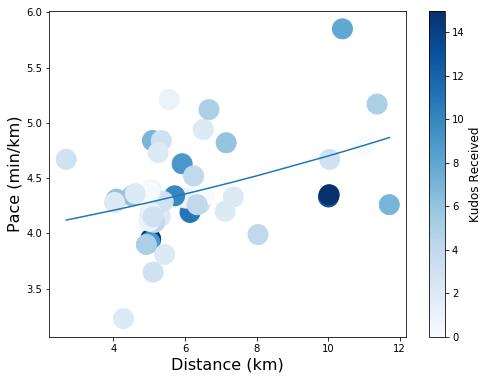

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

x = df['distance']
y = df['average_speed']
colors = df['kudos_count']

fig = plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors,s=400, alpha= 1, cmap='Blues')
cbar = plt.colorbar()
plt.xlabel("Distance (km)",fontsize=16)
plt.ylabel("Pace (min/km)",fontsize=16)
cbar.set_label('Kudos Received', rotation=90, fontsize=12)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))

### How many Virtual Rides Completed?

In [380]:
import pandas as pd
df = pd.DataFrame(data, columns=my_cols)
df['distance'] = round(df['distance']/1000,2)
df['start_date_local'] = df['start_date_local'].str[:7]

In [381]:
count=0
row=0
for i in df.index:
    if len(df['type'][row])==11:
    #if df['type']=='Ride'
        count+=1
    else:
        count+=0
    row+=1
print("There are",count,"Virtual Rides in the dataset")

There are 34 Virtual Rides in the dataset
